# Employee Attrition Prediction (Large Dataset)
This notebook cleans a synthetic dataset (1200+ rows), saves a cleaned CSV, and trains Logistic Regression and Decision Tree models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:

# Load dataset
data = pd.read_csv('employee_data_unclean.csv')
print('Raw Data:')
print(data.head())
print('\nShape:', data.shape)


Raw Data:
   EmployeeID   Age Department   Salary  Experience Overtime Attrition
0           1  50.0        R&D  76850.0        32.0       No        No
1           2  36.0      Sales  84220.0        30.0       No        No
2           3  29.0         IT  36397.0         1.0      Yes       Yes
3           4  42.0         HR  65525.0        17.0      Yes        No
4           5  40.0         IT  83072.0        20.0       No        No

Shape: (1210, 7)


In [4]:
# to remove duplicate values
data = data.drop_duplicates()

In [5]:

# to handle missing values
for col in data.columns:
    if data[col].dtype == 'O':
        data[col]= data[col].fillna(data[col].mode()[0])
    else:
        data[col]=data[col].fillna(data[col].mean())

In [6]:
# processed data saving to use for model training
data.to_csv('employee_data_clean.csv', index=False)
print('\nCleaned dataset saved as employee_data_clean.csv')


Cleaned dataset saved as employee_data_clean.csv


In [7]:
le = LabelEncoder()
data['Department'] = le.fit_transform(data['Department'])
data['Overtime'] = le.fit_transform(data['Overtime'])
data['Attrition'] = le.fit_transform(data['Attrition'])

In [8]:

# setting usefull fetures as x and droping Id and target field
X = data.drop(columns=['EmployeeID','Attrition'])
# setting target column Attrition in y
y = data['Attrition']

# Train test split for model training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('\nTrain set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])


Train set size: 841
Test set size: 361


In [9]:

# Logistic Regression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
y_pred_log = model1.predict(X_test)
print('\n--- Logistic Regression ---')
print('Accuracy:', accuracy_score(y_test, y_pred_log))


--- Logistic Regression ---
Accuracy: 0.7368421052631579


In [11]:
print("confusion matrix : \n",confusion_matrix(y_test, y_pred_log))
print("------classification report--------")
print(classification_report(y_test, y_pred_log))

confusion matrix : 
 [[266   0]
 [ 95   0]]
------classification report--------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       266
           1       0.00      0.00      0.00        95

    accuracy                           0.74       361
   macro avg       0.37      0.50      0.42       361
weighted avg       0.54      0.74      0.63       361



c:\Users\NOBITA-X\Desktop\CLG_TRAINING_DL\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\NOBITA-X\Desktop\CLG_TRAINING_DL\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\NOBITA-X\Desktop\CLG_TRAINING_DL\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [12]:
# Decision Tree
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred_model2 = model2.predict(X_test)
print('\n--- Decision Tree ---')
print('Accuracy:', accuracy_score(y_test, y_pred_model2))
print(confusion_matrix(y_test, y_pred_model2))
print(classification_report(y_test, y_pred_model2))


--- Decision Tree ---
Accuracy: 0.7119113573407202
[[252  14]
 [ 90   5]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       266
           1       0.26      0.05      0.09        95

    accuracy                           0.71       361
   macro avg       0.50      0.50      0.46       361
weighted avg       0.61      0.71      0.63       361



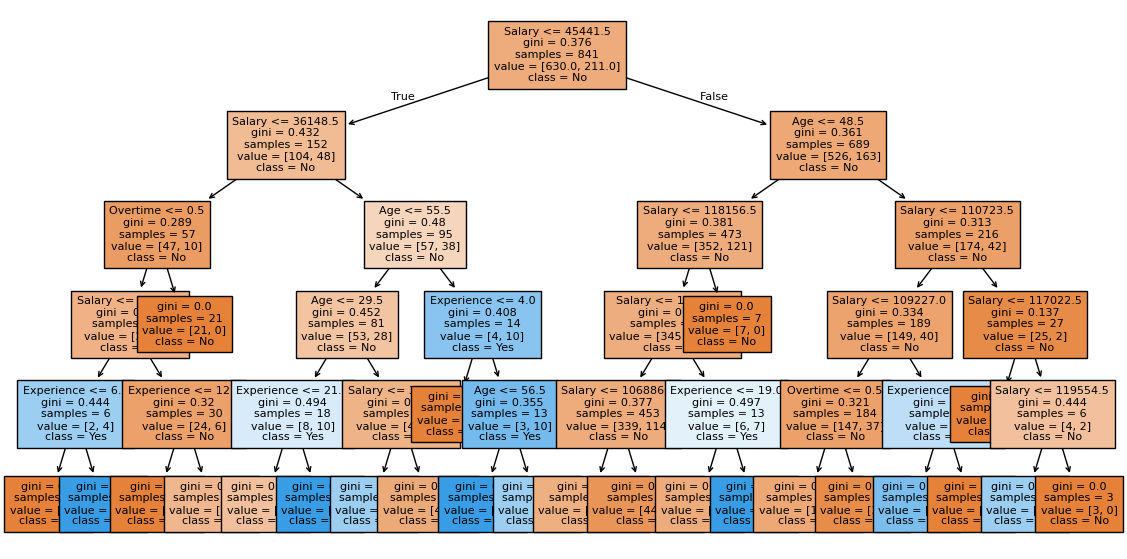

In [14]:
plt.figure(figsize=(14,7))
plot_tree(model2, feature_names=X.columns, class_names=['No','Yes'], filled=True, fontsize=8)
plt.show()

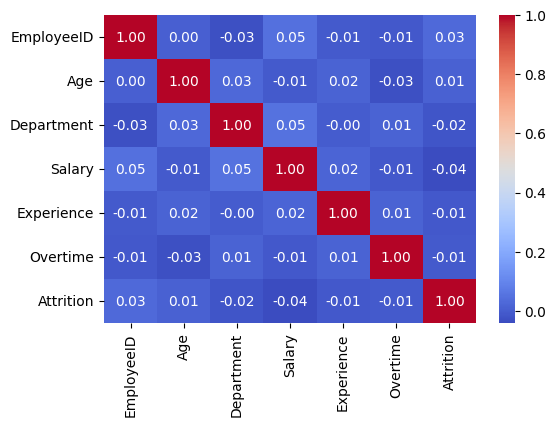

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()